In [2]:
import pandas as pd
df = pd.read_csv('Cleaned_Sales_Data,csv')


In [3]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())


(500, 7)
Product      object
Region       object
Category     object
Sales       float64
Profit      float64
Discount    float64
Date         object
dtype: object
Product     0
Region      0
Category    0
Sales       0
Profit      0
Discount    0
Date        0
dtype: int64


In [5]:
df.drop_duplicates(inplace=True)


In [6]:
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].median())
df['Discount'] = df['Discount'].fillna(0)

/tmp/ipython-input-6-2064860060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].mean(), inplace=True)
/tmp/ipython-input-6-2064860060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
import matplotlib.pyplot as plt
sales_over_time = df.groupby('Date')['Sales'].sum()
plt.figure(figsize=(12,6))
sales_over_time.plot()
plt.title('Sales Trend Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()


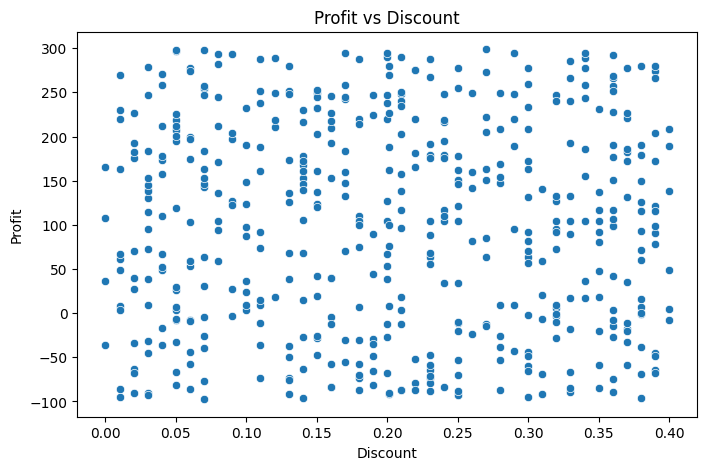

In [12]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Profit vs Discount')
plt.show()


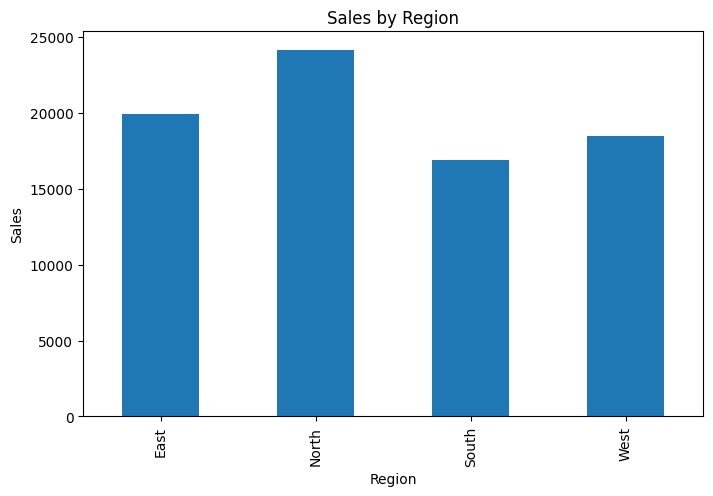

In [11]:
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region.plot(kind='bar', figsize=(8,5))
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.show()


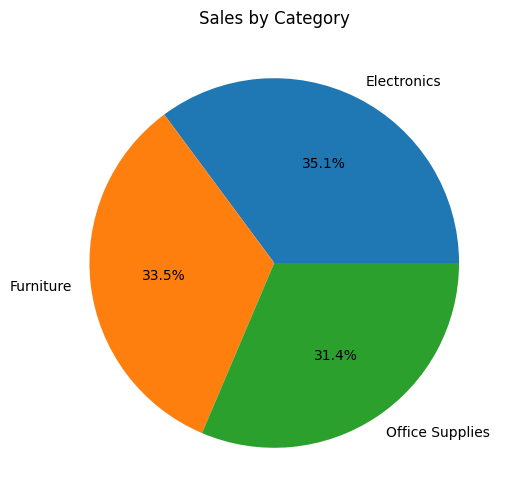

In [10]:
import matplotlib.pyplot as plt
sales_by_category = df.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Sales by Category')
plt.ylabel('')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.6936315295482854
RMSE: 2748.406041331228
